In [2]:
import pandas as pd

df =pd.read_csv('Titanic-Dataset.csv')

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df["Fare"].max()

np.float64(512.3292)

In [19]:
df.loc[df['Fare'].idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [5]:
df_survived = df[df['Survived'] == 1]
df_survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

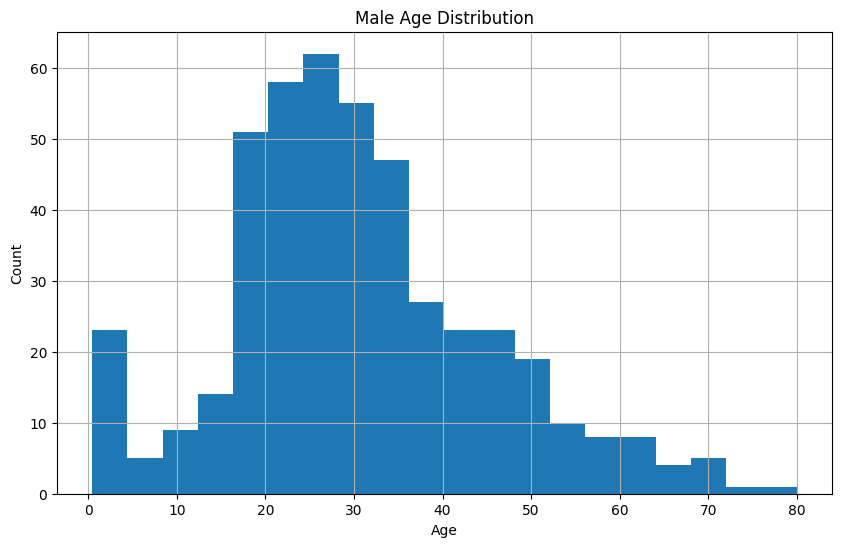

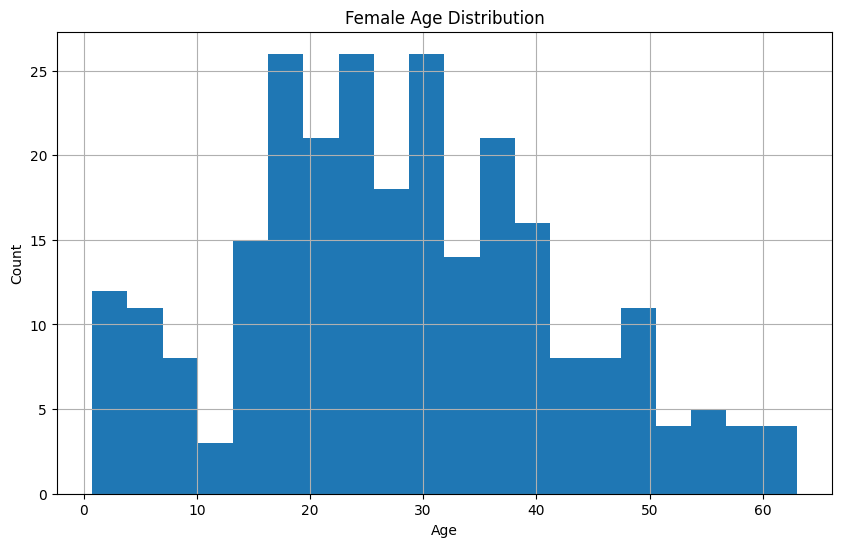

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df[df['Sex'] == 'male']['Age'].dropna().hist(bins=20)
plt.title("Male Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
df[df['Sex'] == 'female']['Age'].dropna().hist(bins=20)
plt.title("Female Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()  

In [21]:
mean_age = df['Age'].mean()
# replace all missing values in age column with mean age
df.fillna({'Age': mean_age}, inplace=True)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [24]:
# convert the 'embarked' column to categorical
df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False, categories_dtype=object)

In [27]:
both_missing = df['Age'].isna() & df['Cabin'].isna()

both_missing.sum()

np.int64(0)

In [30]:
df.dropna(subset=['Age', 'Cabin'], how="all", inplace=True)

In [31]:
df["Family_Size"] = df["SibSp"] + df["Parch"]
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [33]:
df['Fare'].mean()

np.float64(76.14150392156863)

In [32]:
df[df["Fare"] > df["Fare"].mean()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,5
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,1
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,B28,NaN,0
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,C83,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.000000,1,1,12749,93.5000,B69,S,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.0000,B28,NaN,0
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.000000,1,1,PC 17756,83.1583,E49,C,2
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C,1


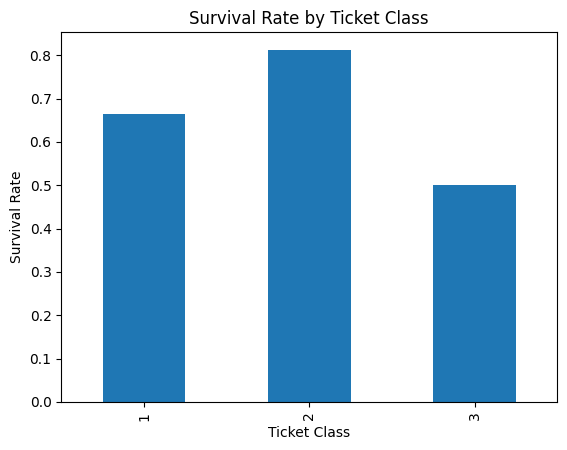

In [34]:
# visualize the survival rate based on ticket class using bar chart

survival_rate = df.groupby('Pclass')['Survived'].mean()
survival_rate.plot(kind='bar', title='Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()

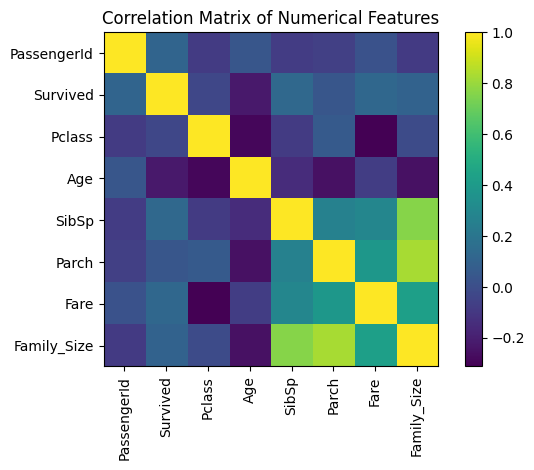

In [36]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure()
plt.imshow(corr_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

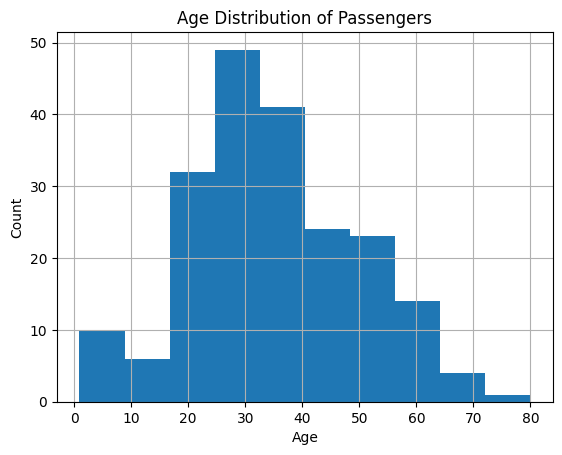

In [39]:
plt.figure()
df['Age'].hist()
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [38]:
embarked_counts = df['Embarked'].value_counts(dropna=False)
embarked_pct = embarked_counts / len(df) * 100
print("Percentage of passengers by Embarked port:")
print(embarked_pct)

Percentage of passengers by Embarked port:
Embarked
S      63.235294
C      33.823529
Q       1.960784
NaN     0.980392
Name: count, dtype: float64


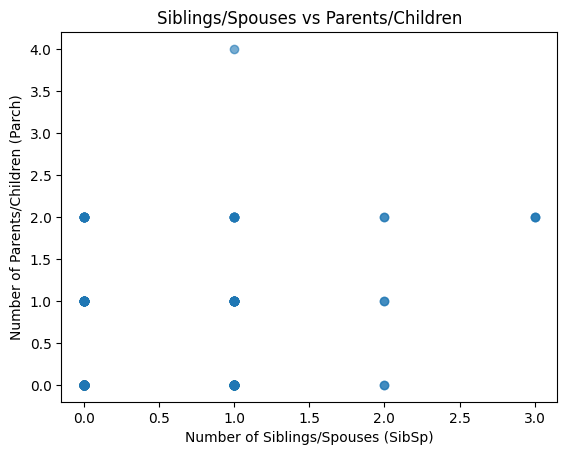

In [40]:
plt.figure()
plt.scatter(df['SibSp'], df['Parch'], alpha=0.6)
plt.title('Siblings/Spouses vs Parents/Children')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Number of Parents/Children (Parch)')
plt.show()

In [41]:
# sort the age column in desc order:

df['Age'].sort_values(ascending=False)



630    80.00
96     71.00
745    70.00
54     65.00
456    65.00
       ...  
297     2.00
205     2.00
340     2.00
183     1.00
305     0.92
Name: Age, Length: 204, dtype: float64

In [42]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    85.815152
2    18.063544
3    11.698608
Name: Fare, dtype: float64

In [43]:
df_18 = df[df['Age'] <= 18]
df_18_above = df[df['Age'] > 18]

In [44]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=3, labels=['Low', 'Medium', 'High'])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Fare_Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Low
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Low
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,Low
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,Low


In [46]:
counts = (
    df
    .groupby(['Pclass', 'Survived'])
    .size()
    .reset_index(name='Passenger_Count')
)
counts

,Pclass,Survived,Passenger_Count
0,1,0,59
1,1,1,117
2,2,0,3
3,2,1,13
4,3,0,6
5,3,1,6
